In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from phik import phik_matrix
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
import random
import json

In [14]:
# 读取 Excel 文件
df = pd.read_excel('../DataSource/result.xlsx')

# 遍历 DataFrame 的列
for column in df.columns:
    # 如果列名包含"."，表示为子技术列
    if '.' in column:
        # 提取主技术名称，例如 T1548.002 提取为 T1548
        main_technique = column.split('.')[0]
        
        # 将子技术列的值加到主技术列中
        df[main_technique] = df.get(main_technique, 0) | df[column]

# 删除原始的子技术列
df = df.drop(columns=[col for col in df.columns if '.' in col])

# 将结果保存到新的 Excel 文件
df.to_excel('../DataSource/compressed_results.xlsx', index=False)

In [16]:
# 读取 Excel 文件
df_compressed = pd.read_excel('../DataSource/compressed_results.xlsx')

# 删除 source_id 列
df_compressed = df_compressed.drop('source ID', axis=1)

# 打印或进一步处理 DataFrame
print(df_compressed)

     T1548  T1134  T1531  T1087  T1098  T1583  T1595  T1557  T1071  T1010  \
0        0      0      0      0      0      0      0      0      0      0   
1        0      0      0      1      0      1      0      0      0      0   
2        0      0      0      0      0      0      0      0      0      0   
3        0      0      0      0      0      0      0      0      0      0   
4        0      0      0      0      0      1      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
125      0      0      0      0      0      1      0      0      0      0   
126      0      0      0      1      0      0      0      1      1      0   
127      0      0      0      0      0      1      0      0      0      0   
128      0      0      0      1      0      0      0      0      0      0   
129      0      0      0      1      0      1      0      0      0      0   

     ...  T1535  T1550  T1204  T1078  T1125  T1497  T1600  T1102  T1047  T1

In [22]:
# 计算每列的和，即每个technique_id的使用频率
technique_usage = df_compressed.sum()

In [27]:
print(technique_usage)

T1548     9
T1134     6
T1531     1
T1087    24
T1098    11
         ..
T1497     5
T1600     0
T1102    33
T1047    26
T1220     3
Length: 193, dtype: int64


In [28]:
# 创建包含technique_id和使用频率的DataFrame
technique_usage_df = pd.DataFrame({'technique_id': technique_usage.index, 'usage_count': technique_usage.values})

In [29]:
print(technique_usage_df)

    technique_id  usage_count
0          T1548            9
1          T1134            6
2          T1531            1
3          T1087           24
4          T1098           11
..           ...          ...
188        T1497            5
189        T1600            0
190        T1102           33
191        T1047           26
192        T1220            3

[193 rows x 2 columns]


In [30]:
zero_frequency_technique_list = []
for index, row in technique_usage_df.iterrows():
    technique_id = row['technique_id']
    usage_count = row['usage_count']
    if usage_count == 0:
        zero_frequency_technique_list.append(technique_id)

In [31]:
print(zero_frequency_technique_list)
# 使用set去重并计算不同技术ID的数量
unique_technique_ids = set(zero_frequency_technique_list)
count_unique_technique_ids = len(zero_frequency_technique_list)

# 打印不同技术ID的数量
print(f"不同技术ID的数量：{count_unique_technique_ids}")

['T1185', 'T1612', 'T1580', 'T1538', 'T1526', 'T1619', 'T1554', 'T1602', 'T1622', 'T1006', 'T1011', 'T1212', 'T1495', 'T1525', 'T1490', 'T1601', 'T1599', 'T1647', 'T1207', 'T1596', 'T1648', 'T1129', 'T1537', 'T1127', 'T1535', 'T1600']
不同技术ID的数量：26


In [32]:
grouped = technique_usage_df.groupby('usage_count')['technique_id'].apply(list).reset_index()
result = grouped.to_dict(orient='records')

# 保存为 JSON 文件
with open('frequency_id_compressed.json', 'w') as json_file:
    json.dump(result, json_file)

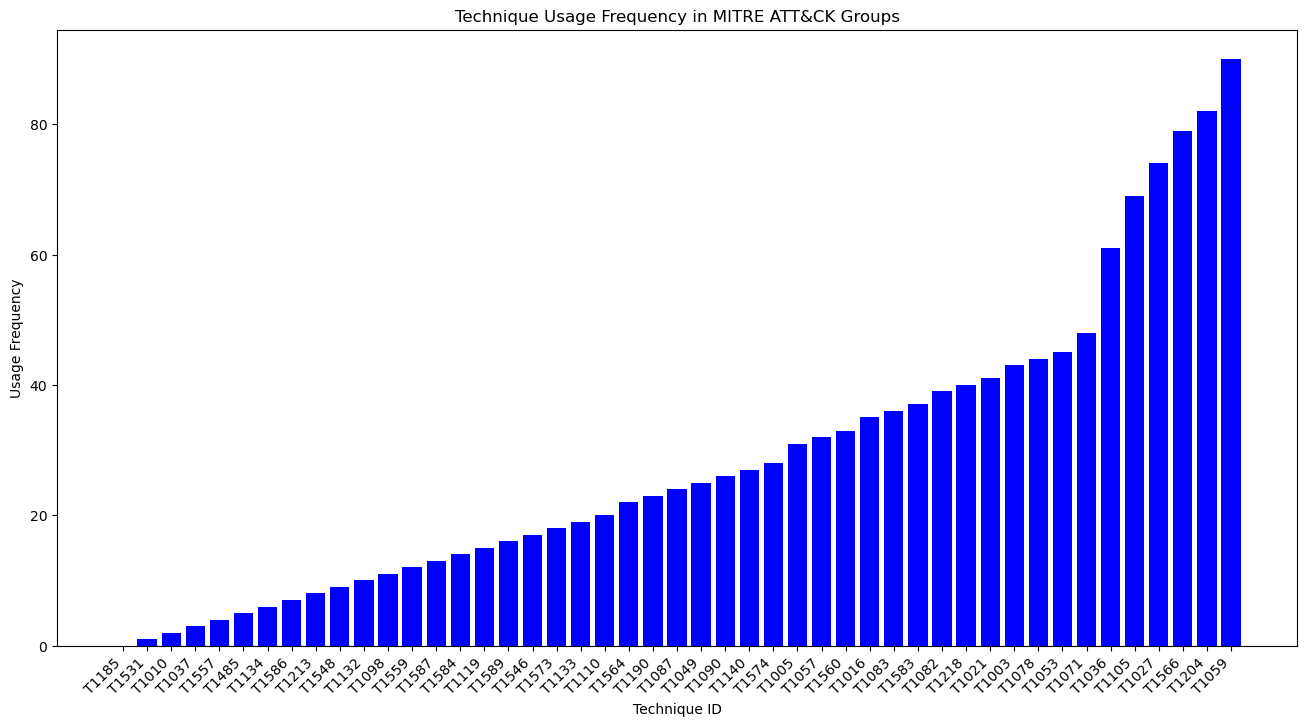

In [34]:
import json
import matplotlib.pyplot as plt

# 从JSON文件中读取数据
with open('frequency_id.json', 'r') as file:
    data = json.load(file)

# 提取技术名称和使用频率，仅保留每个条形的第一个技术ID
techniques = [entry["technique_id"][0] for entry in data]
usage_counts = [entry["usage_count"] for entry in data]

# 设置图表大小
plt.figure(figsize=(16, 8))

# 创建条形图
plt.bar(techniques, usage_counts, color='blue')

# 添加标签和标题
plt.xlabel('Technique ID')
plt.ylabel('Usage Frequency')
plt.title('Technique Usage Frequency in MITRE ATT&CK Groups')

# 自定义样式（可选）
plt.xticks(rotation=45, ha='right')

# 显示图表
plt.show()


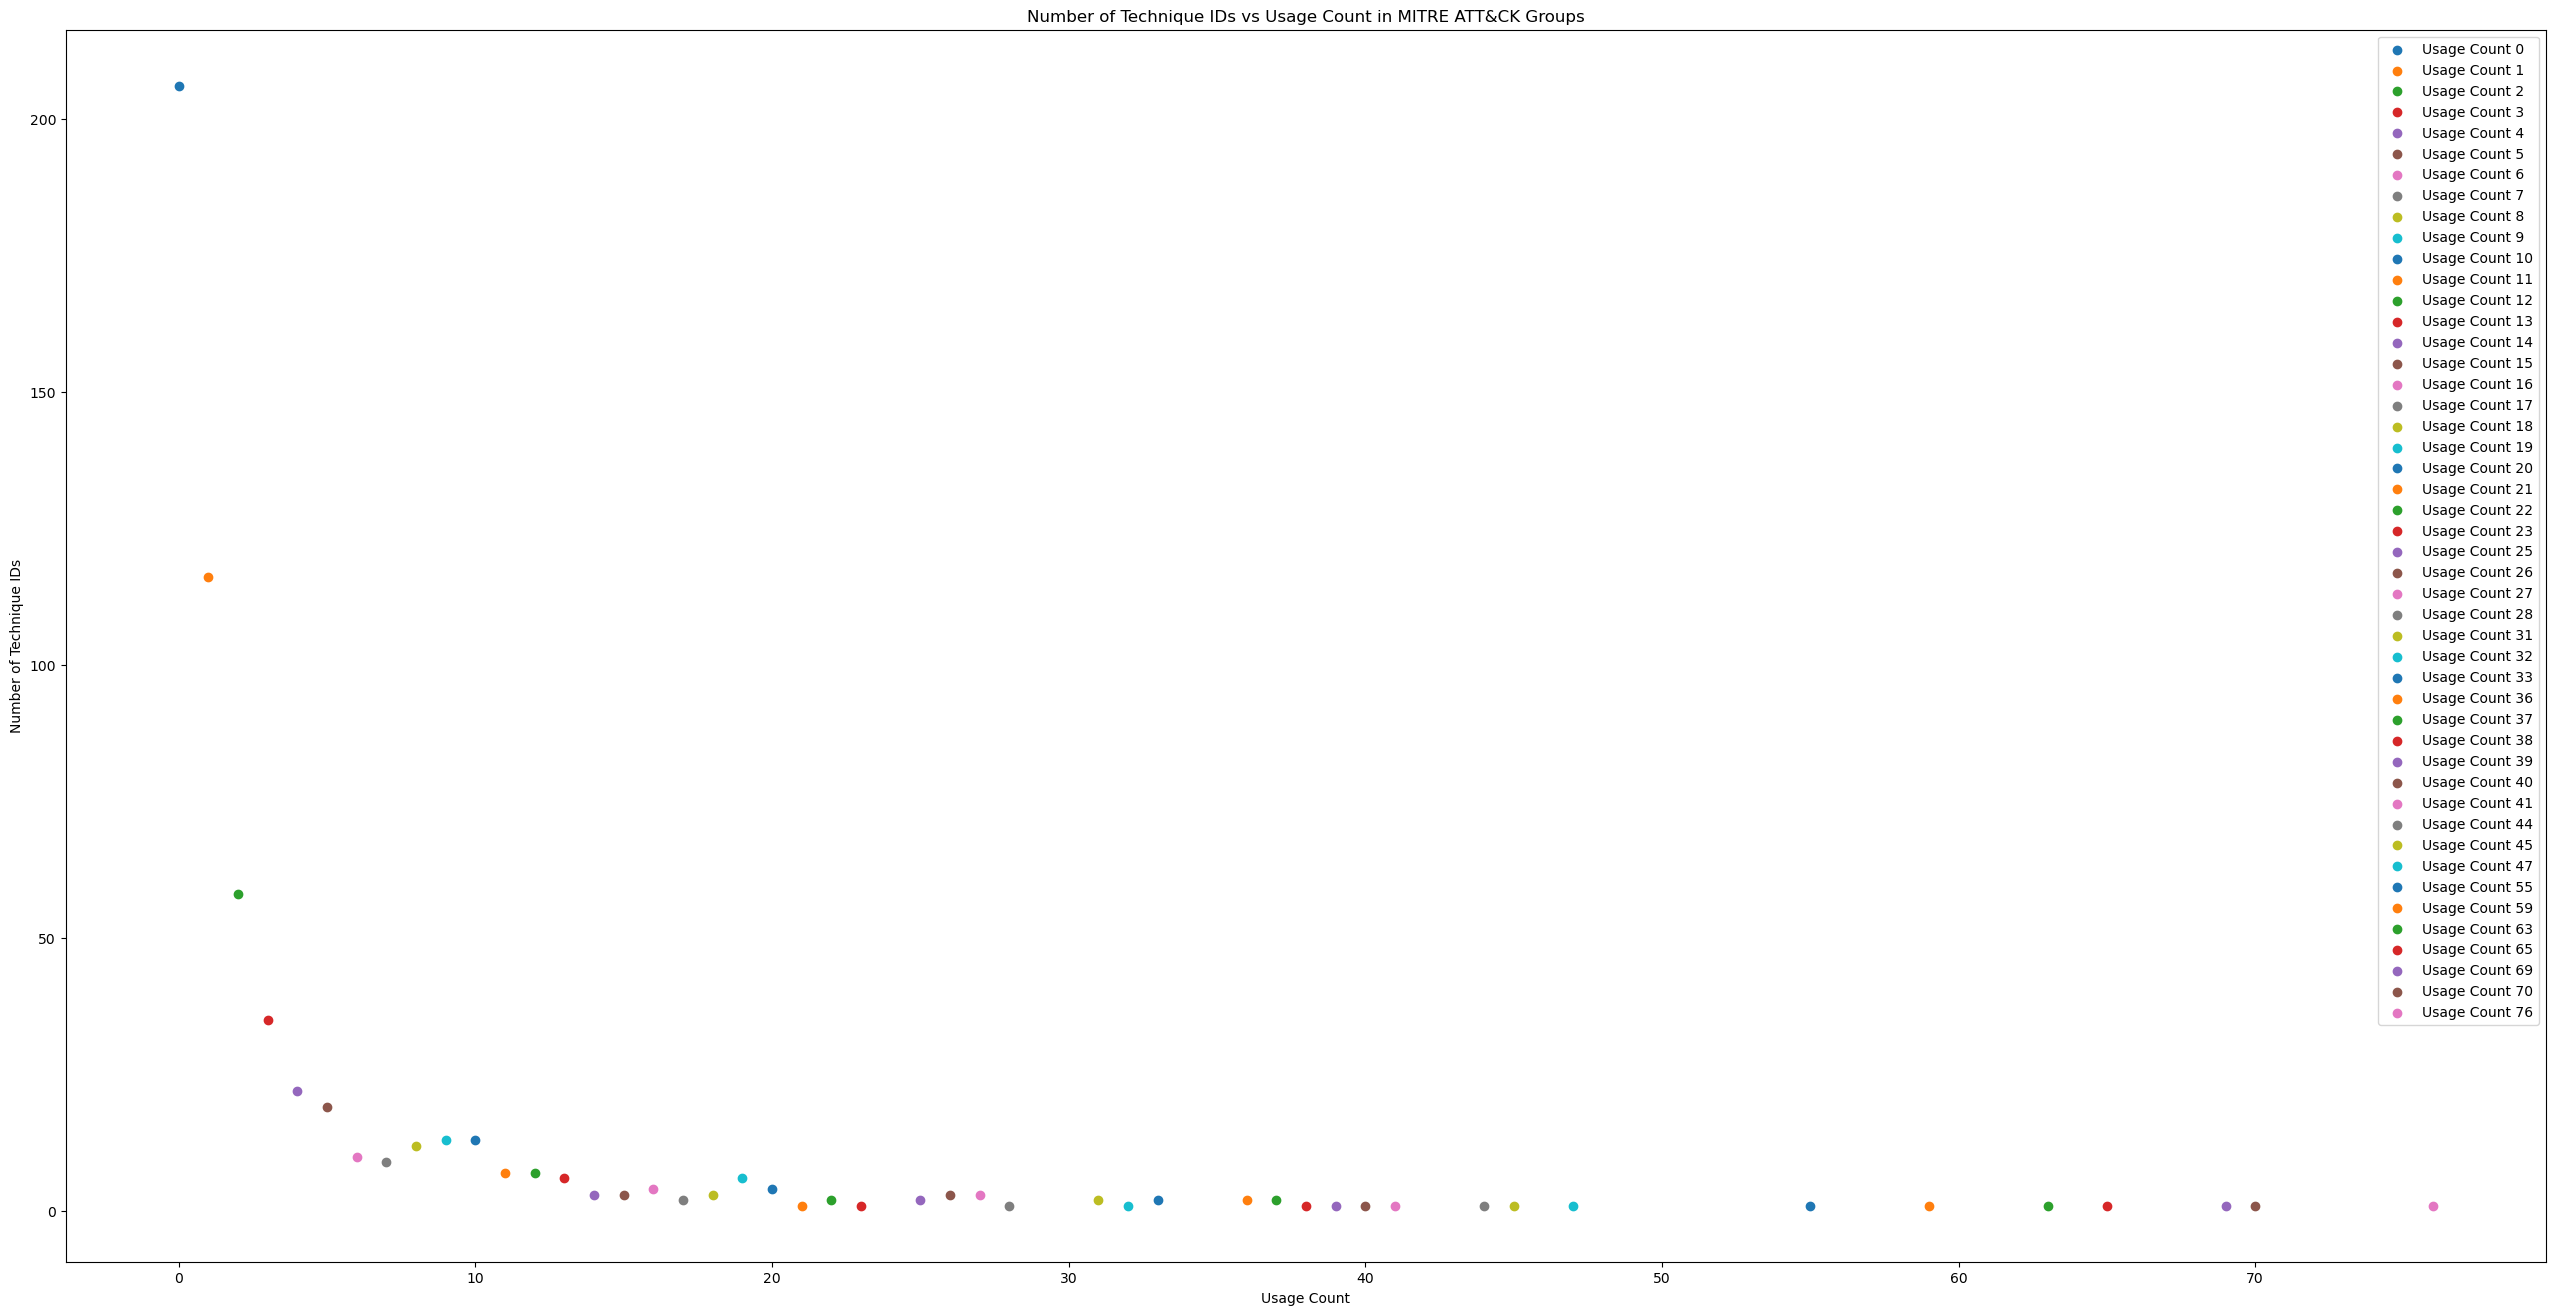

In [32]:
import json
import matplotlib.pyplot as plt

# 从JSON文件中读取数据
with open('frequency_id.json', 'r') as file:
    data = json.load(file)

# 创建一个字典，用于存储每个 use_count 对应的 technique_id 列表数量
count_dict = {}

# 遍历数据，更新字典
for entry in data:
    usage_count = entry["usage_count"]
    technique_count = len(entry["technique_id"])
    
    if usage_count not in count_dict:
        count_dict[usage_count] = []
    
    count_dict[usage_count].append(technique_count)

# 设置图表大小
plt.figure(figsize=(32, 16))

# 创建散点图
for usage_count, counts in count_dict.items():
    plt.scatter([usage_count] * len(counts), counts, label=f'Usage Count {usage_count}')

# 添加标签和标题
plt.xlabel('Usage Count')
plt.ylabel('Number of Technique IDs')
plt.title('Number of Technique IDs vs Usage Count in MITRE ATT&CK Groups')
plt.legend()

# 显示图表
plt.show()

# 数据清晰

In [37]:
# 假设zero_frequency_technique_list包含要删除的技术ID
columns_to_remove = zero_frequency_technique_list

# 使用drop方法删除指定的列
df_compressed= df_compressed.drop(columns=columns_to_remove)

In [38]:
print(df_compressed)

     T1548  T1134  T1531  T1087  T1098  T1583  T1595  T1557  T1071  T1010  \
0        0      0      0      0      0      0      0      0      0      0   
1        0      0      0      1      0      1      0      0      0      0   
2        0      0      0      0      0      0      0      0      0      0   
3        0      0      0      0      0      0      0      0      0      0   
4        0      0      0      0      0      1      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
125      0      0      0      0      0      1      0      0      0      0   
126      0      0      0      1      0      0      0      1      1      0   
127      0      0      0      0      0      1      0      0      0      0   
128      0      0      0      1      0      0      0      0      0      0   
129      0      0      0      1      0      1      0      0      0      0   

     ...  T1199  T1552  T1550  T1204  T1078  T1125  T1497  T1102  T1047  T1

In [39]:
# 将DataFrame转换为NumPy数组
data_array = df_compressed.values

# # 定义每个批次的大小
# batch_size = 75

# 计算距离矩阵的维度
num_samples = data_array.shape[0]

# 初始化一个空的距离矩阵
distance_matrix = np.zeros((num_samples, num_samples))

### jacard距离核心代码

In [ ]:
# 分批计算距离矩阵
for i in range(0, num_samples, batch_size):
    start_idx = i
    end_idx = min(i + batch_size, num_samples)
    
    # 计算当前批次内样本之间的Jaccard距离
    batch_distance = pairwise_distances(data_array[start_idx:end_idx], metric='jaccard')
    
    # 将当前批次内的距离矩阵填充到整体距离矩阵中
    distance_matrix[start_idx:end_idx, start_idx:end_idx] = batch_distance

# 将Jaccard距离转换为欧氏距离，以便与Ward链接法兼容
euclidean_distance = squareform(distance_matrix)

# 将欧氏距离数组转换成2D数组
euclidean_distance = euclidean_distance.reshape(-1, 1)

# 使用Ward链接法进行聚类
n_clusters = 16
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(euclidean_distance)

#### phi系数核心代码

In [41]:
# 计算整个样本之间的Phi系数矩阵（相似性矩阵）
full_distance_matrix = phik_matrix(df_compressed)

# 使用层次聚类进行聚类
linkage_matrix = linkage(full_distance_matrix, method='ward')

interval columns not set, guessing: ['T1548', 'T1134', 'T1531', 'T1087', 'T1098', 'T1583', 'T1595', 'T1557', 'T1071', 'T1010', 'T1560', 'T1123', 'T1119', 'T1020', 'T1197', 'T1547', 'T1037', 'T1217', 'T1176', 'T1110', 'T1115', 'T1059', 'T1092', 'T1586', 'T1584', 'T1609', 'T1613', 'T1136', 'T1543', 'T1555', 'T1485', 'T1132', 'T1486', 'T1565', 'T1001', 'T1074', 'T1030', 'T1530', 'T1213', 'T1005', 'T1039', 'T1025', 'T1491', 'T1140', 'T1610', 'T1587', 'T1561', 'T1484', 'T1482', 'T1189', 'T1568', 'T1114', 'T1573', 'T1499', 'T1611', 'T1585', 'T1546', 'T1480', 'T1048', 'T1041', 'T1052', 'T1567', 'T1190', 'T1203', 'T1211', 'T1068', 'T1210', 'T1133', 'T1008', 'T1083', 'T1222', 'T1187', 'T1606', 'T1592', 'T1589', 'T1590', 'T1591', 'T1615', 'T1200', 'T1564', 'T1574', 'T1562', 'T1070', 'T1202', 'T1105', 'T1056', 'T1559', 'T1534', 'T1570', 'T1036', 'T1556', 'T1578', 'T1112', 'T1111', 'T1621', 'T1104', 'T1106', 'T1498', 'T1046', 'T1135', 'T1040', 'T1095', 'T1571', 'T1003', 'T1027', 'T1588', 'T1137', 

In [42]:
print(linkage_matrix)

[[7.30000000e+01 7.50000000e+01 5.13398770e-02 2.00000000e+00]
 [7.20000000e+01 1.39000000e+02 4.29725078e-01 2.00000000e+00]
 [2.00000000e+00 9.10000000e+01 4.29725078e-01 2.00000000e+00]
 [8.30000000e+01 1.18000000e+02 4.29725078e-01 2.00000000e+00]
 [2.20000000e+01 6.40000000e+01 4.29725078e-01 2.00000000e+00]
 [9.70000000e+01 1.71000000e+02 4.29725078e-01 3.00000000e+00]
 [1.37000000e+02 1.72000000e+02 4.29725078e-01 4.00000000e+00]
 [2.50000000e+01 2.60000000e+01 4.29725078e-01 2.00000000e+00]
 [4.40000000e+01 1.74000000e+02 4.29725078e-01 3.00000000e+00]
 [5.40000000e+01 1.75000000e+02 4.29725078e-01 4.00000000e+00]
 [1.10000000e+02 1.60000000e+02 8.47307585e-01 2.00000000e+00]
 [2.00000000e+01 3.30000000e+01 1.08094147e+00 2.00000000e+00]
 [1.29000000e+02 1.69000000e+02 1.12810523e+00 3.00000000e+00]
 [1.34000000e+02 1.49000000e+02 1.15858607e+00 2.00000000e+00]
 [6.00000000e+01 1.23000000e+02 1.18642940e+00 2.00000000e+00]
 [3.00000000e+01 4.20000000e+01 1.18776093e+00 2.000000

In [43]:
print(full_distance_matrix)

          T1548     T1134   T1531     T1087     T1098     T1583     T1595  \
T1548  1.000000  0.000000  0.0000  0.178320  0.000000  0.000000  0.089998   
T1134  0.000000  1.000000  0.0000  0.154020  0.152247  0.000000  0.000000   
T1531  0.000000  0.000000  1.0000  0.000000  0.153700  0.000000  0.000000   
T1087  0.178320  0.154020  0.0000  1.000000  0.464104  0.288305  0.178320   
T1098  0.000000  0.152247  0.1537  0.464104  1.000000  0.564190  0.827987   
...         ...       ...     ...       ...       ...       ...       ...   
T1125  0.000000  0.000000  0.0000  0.000000  0.000000  0.000000  0.000000   
T1497  0.000000  0.000000  0.0000  0.000000  0.000000  0.000000  0.000000   
T1102  0.198763  0.362051  0.0000  0.200612  0.337809  0.518665  0.198763   
T1047  0.148165  0.297696  0.0000  0.483871  0.207474  0.308484  0.148165   
T1220  0.000000  0.015813  0.0000  0.000000  0.000000  0.000000  0.000000   

          T1557     T1071     T1010  ...     T1199     T1552     T1550  \
T

In [44]:
# 获取包含所有技术索引名称的列表
all_tech_names = full_distance_matrix.index.tolist()

print("所有技术索引名称的列表：")
print(all_tech_names)

所有技术索引名称的列表：
['T1548', 'T1134', 'T1531', 'T1087', 'T1098', 'T1583', 'T1595', 'T1557', 'T1071', 'T1010', 'T1560', 'T1123', 'T1119', 'T1020', 'T1197', 'T1547', 'T1037', 'T1217', 'T1176', 'T1110', 'T1115', 'T1059', 'T1092', 'T1586', 'T1584', 'T1609', 'T1613', 'T1136', 'T1543', 'T1555', 'T1485', 'T1132', 'T1486', 'T1565', 'T1001', 'T1074', 'T1030', 'T1530', 'T1213', 'T1005', 'T1039', 'T1025', 'T1491', 'T1140', 'T1610', 'T1587', 'T1561', 'T1484', 'T1482', 'T1189', 'T1568', 'T1114', 'T1573', 'T1499', 'T1611', 'T1585', 'T1546', 'T1480', 'T1048', 'T1041', 'T1052', 'T1567', 'T1190', 'T1203', 'T1211', 'T1068', 'T1210', 'T1133', 'T1008', 'T1083', 'T1222', 'T1187', 'T1606', 'T1592', 'T1589', 'T1590', 'T1591', 'T1615', 'T1200', 'T1564', 'T1574', 'T1562', 'T1070', 'T1202', 'T1105', 'T1056', 'T1559', 'T1534', 'T1570', 'T1036', 'T1556', 'T1578', 'T1112', 'T1111', 'T1621', 'T1104', 'T1106', 'T1498', 'T1046', 'T1135', 'T1040', 'T1095', 'T1571', 'T1003', 'T1027', 'T1588', 'T1137', 'T1201', 'T1120', 'T106

[[7.30000000e+01 7.50000000e+01 5.13398770e-02 2.00000000e+00]
 [7.20000000e+01 1.39000000e+02 4.29725078e-01 2.00000000e+00]
 [2.00000000e+00 9.10000000e+01 4.29725078e-01 2.00000000e+00]
 [8.30000000e+01 1.18000000e+02 4.29725078e-01 2.00000000e+00]
 [2.20000000e+01 6.40000000e+01 4.29725078e-01 2.00000000e+00]
 [9.70000000e+01 1.71000000e+02 4.29725078e-01 3.00000000e+00]
 [1.37000000e+02 1.72000000e+02 4.29725078e-01 4.00000000e+00]
 [2.50000000e+01 2.60000000e+01 4.29725078e-01 2.00000000e+00]
 [4.40000000e+01 1.74000000e+02 4.29725078e-01 3.00000000e+00]
 [5.40000000e+01 1.75000000e+02 4.29725078e-01 4.00000000e+00]
 [1.10000000e+02 1.60000000e+02 8.47307585e-01 2.00000000e+00]
 [2.00000000e+01 3.30000000e+01 1.08094147e+00 2.00000000e+00]
 [1.29000000e+02 1.69000000e+02 1.12810523e+00 3.00000000e+00]
 [1.34000000e+02 1.49000000e+02 1.15858607e+00 2.00000000e+00]
 [6.00000000e+01 1.23000000e+02 1.18642940e+00 2.00000000e+00]
 [3.00000000e+01 4.20000000e+01 1.18776093e+00 2.000000

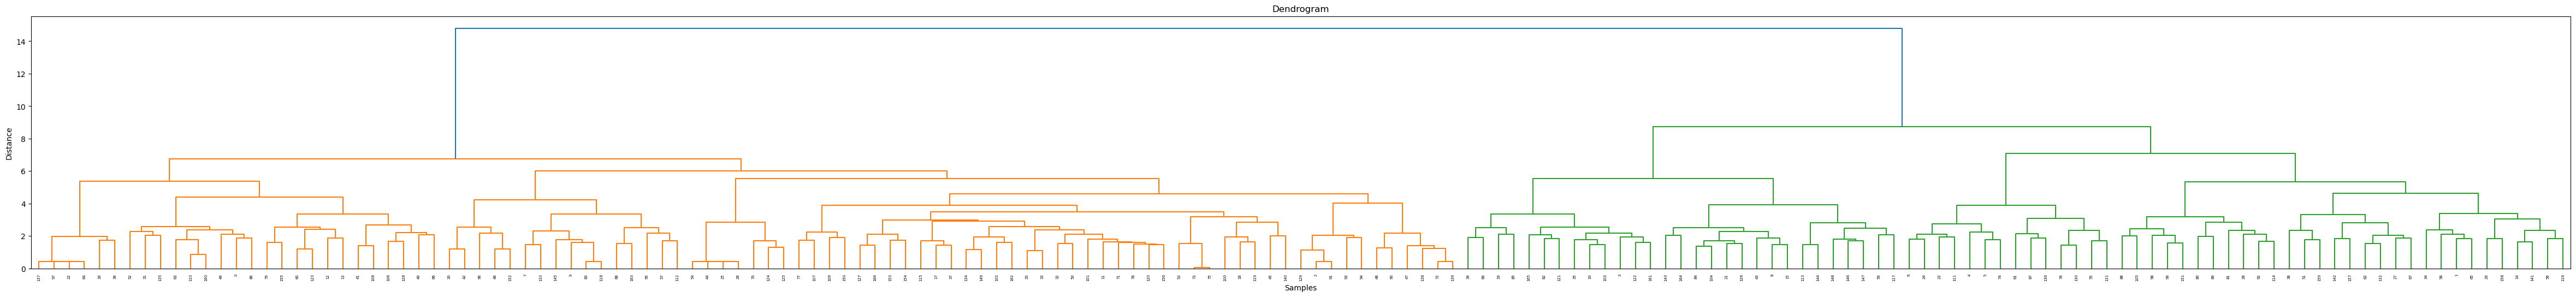

In [45]:
print(linkage_matrix)
# 绘制树状图（树状图可以帮助你选择合适的聚类数量）
plt.figure(figsize=(60, 6))
dendrogram(linkage_matrix,orientation='top')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

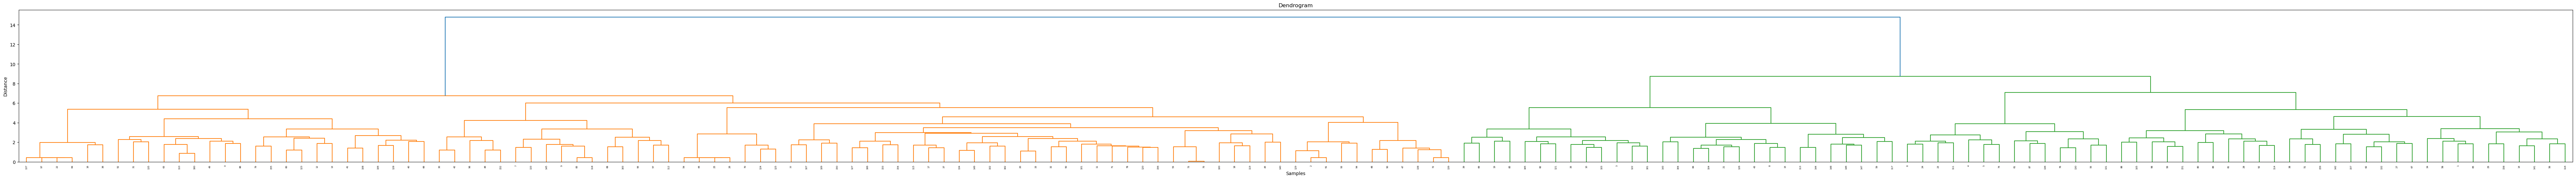

In [53]:
plt.figure(figsize=(100, 6))
dendrogram(linkage_matrix, truncate_mode='level')['ivl']
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [46]:
from scipy.cluster.hierarchy import fcluster

# 设置截断高度（根据你的需求选择合适的值）
cutoff = 4.0  # 举例，你可以根据实际情况调整 学习到了46个不同的聚类标签。

# 使用fcluster函数进行聚类
cluster_result = fcluster(linkage_matrix, cutoff, criterion='distance')

# 打印聚类结果
print(cluster_result)

[ 2 15  8 10 12 12 12  5 11  5 10  7  3  3 15 11  1  7  7 10  7 11  1 12
 12  6  6 14 13 15  4  2  7  7 15 10  1  7 14 10  3  3  4 11  6  7  4  9
  9  2  7 14  2  7  6 12 15  5 15 11  3 12 14  2  1 15  3 14  5 10  6  7
  9  7 12  7 12  7  7  3 13 13 10  5 11 10  2 12 13 13  9  8 13  8  8  5
  4  1 13 13  7  7  7 10 11 13  3  7  3  7  2 12  5 11 13  7 15 11  5  7
  7 10 10  3  6  6 11  7  3  8 12 12 14  5  7  2 12  1  9  9  7 15 14 11
 11  5 11 11 11  7  7 13  4  7  7  3  7 14 15 14  2 10  7  5 11 10  7]


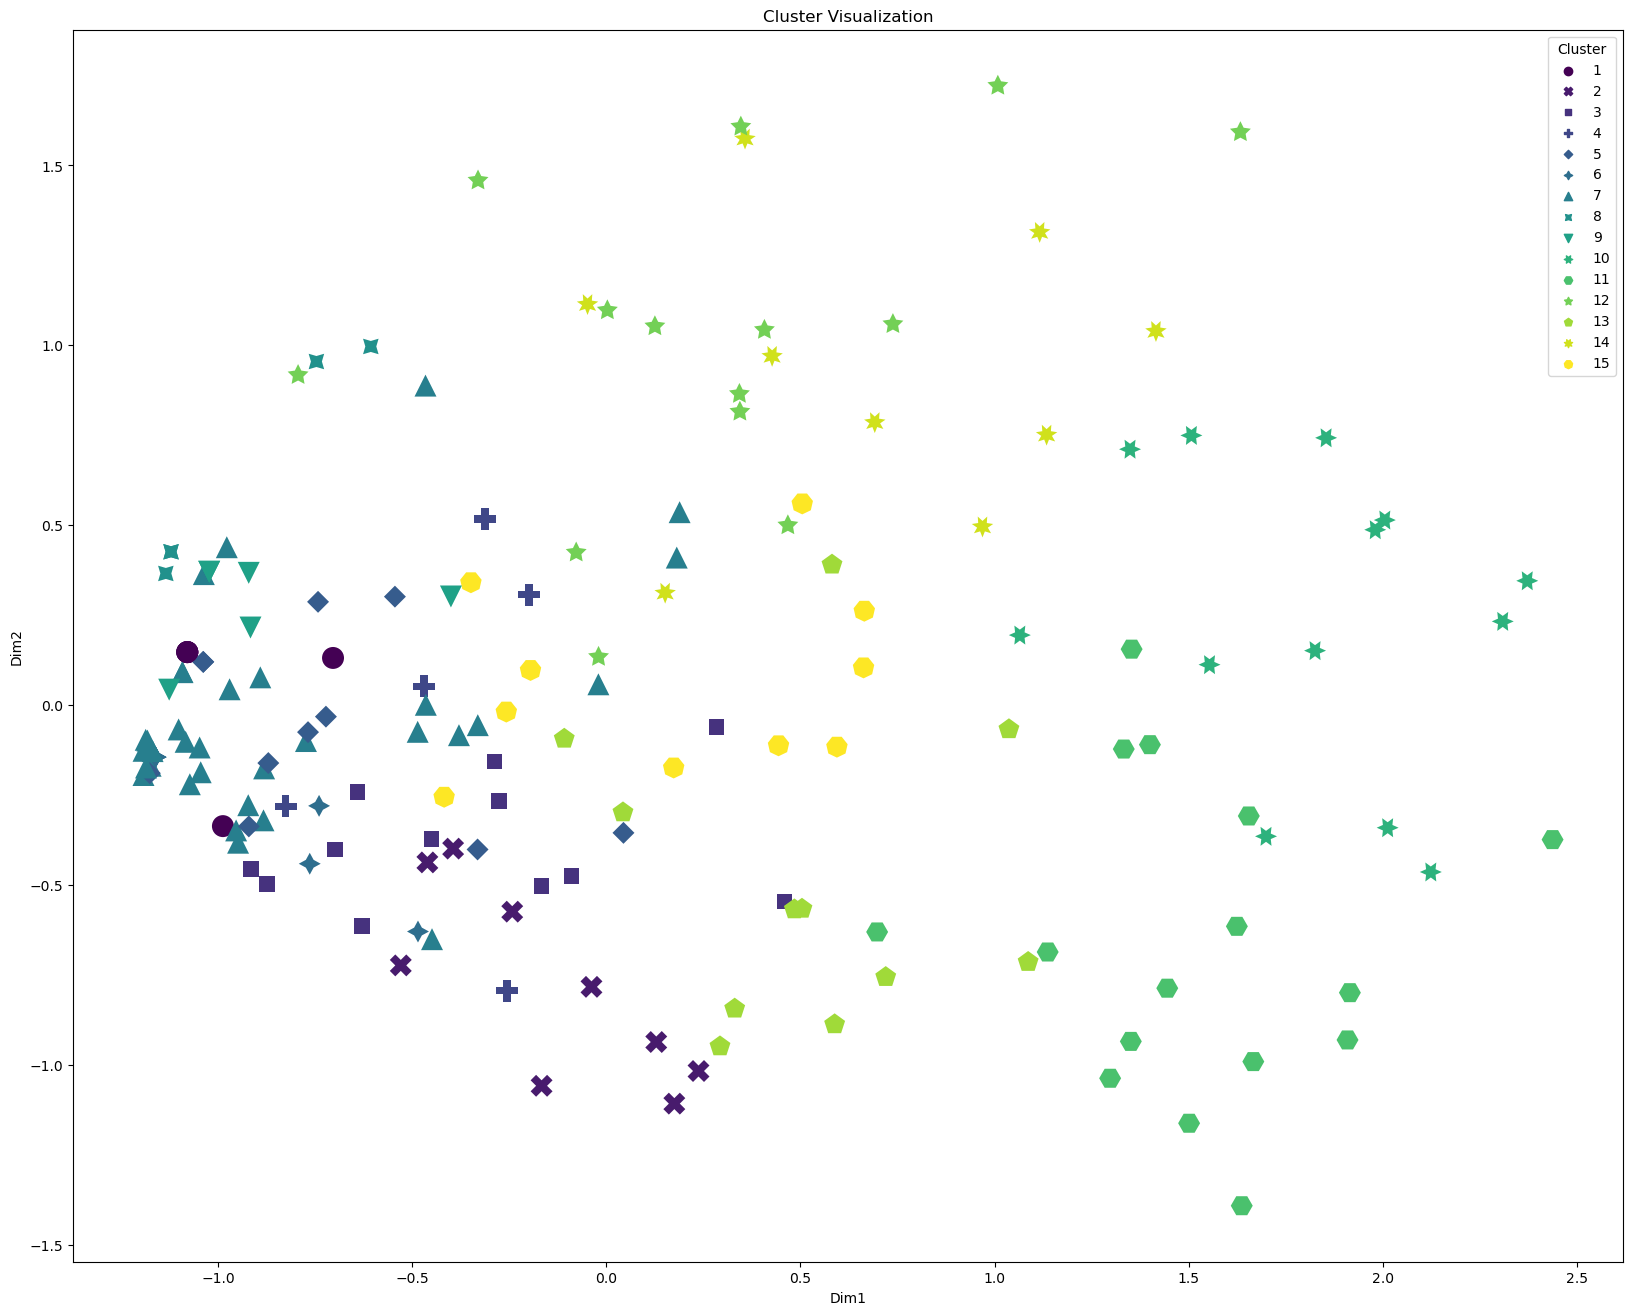

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 使用 PCA 进行降维
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(full_distance_matrix)  # 请将 your_data 替换为实际的数据

# 创建 DataFrame 存储聚类结果和降维后的数据
clustered_data = pd.DataFrame({'Cluster': cluster_result, 'Dim1': reduced_data[:, 0], 'Dim2': reduced_data[:, 1]})

# 使用 Seaborn 绘制色块图
plt.figure(figsize=(20, 16))
sns.scatterplot(x='Dim1', y='Dim2', data=clustered_data, palette='viridis', legend='full', s=250,
                hue='Cluster', style='Cluster', edgecolor='none')
plt.title('Cluster Visualization')
plt.show()

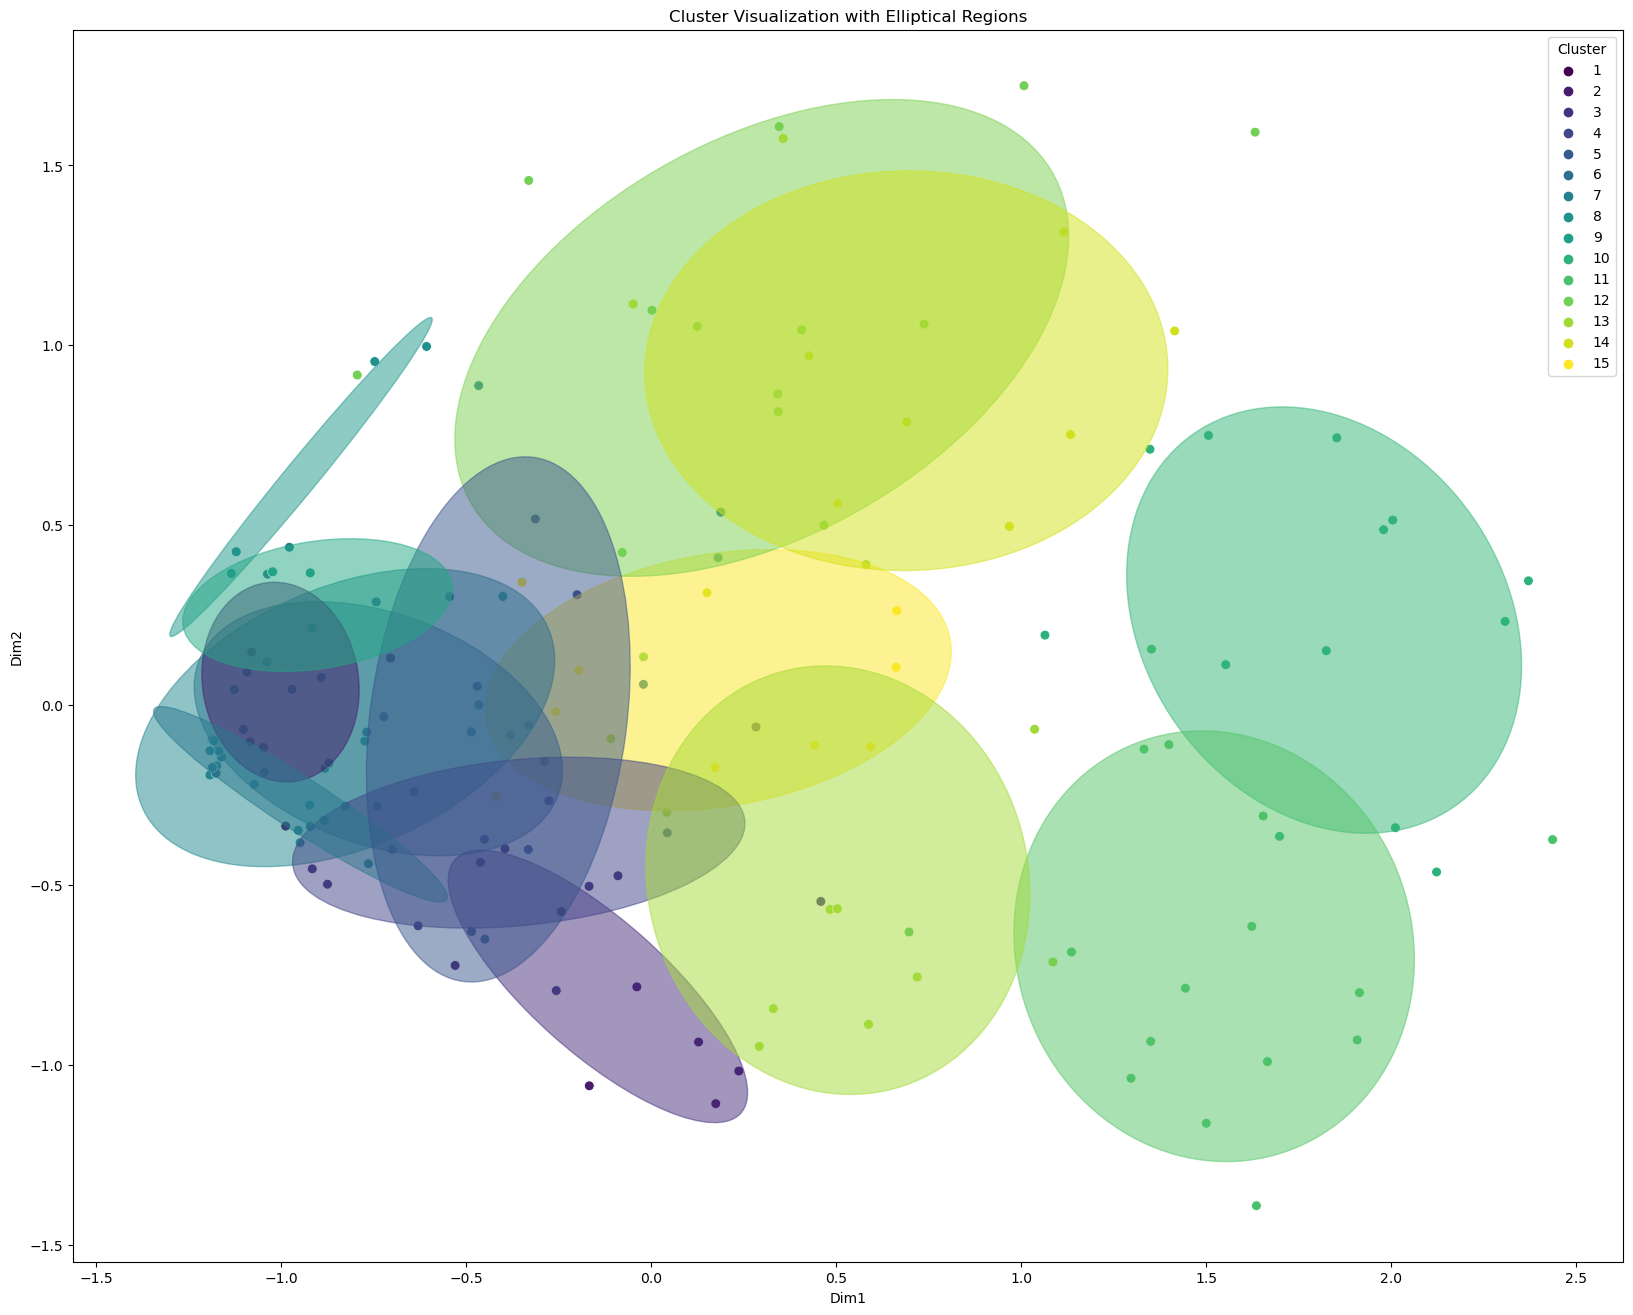

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import numpy as np

# 使用 PCA 进行降维
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(full_distance_matrix)  # 请将 your_data 替换为实际的数据

# 创建 DataFrame 存储聚类结果和降维后的数据
clustered_data = pd.DataFrame({'Cluster': cluster_result, 'Dim1': reduced_data[:, 0], 'Dim2': reduced_data[:, 1]})

# 创建一个新的图形
plt.figure(figsize=(20, 16))

# 使用 Seaborn 绘制散点图
sns.scatterplot(x='Dim1', y='Dim2', data=clustered_data, palette='viridis', s=50, hue='Cluster', legend='full')

# 遍历每个聚类，绘制椭圆形框
for cluster in clustered_data['Cluster'].unique():
    cluster_points = clustered_data[clustered_data['Cluster'] == cluster][['Dim1', 'Dim2']]
    cov_matrix = cluster_points.cov()  # 计算协方差矩阵
    v, w = np.linalg.eigh(cov_matrix)  # 计算特征值和特征向量
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # 将特征值转换为半轴长度

    # 计算椭圆形的中心点
    center = cluster_points.mean()

    # 创建椭圆形
    ell = Ellipse(xy=center, width=v[0], height=v[1], angle=np.degrees(np.arctan2(*w[:, 0][::-1])))

    # 设置椭圆形的样式
    ell.set_facecolor(plt.cm.viridis(cluster / clustered_data['Cluster'].nunique()))  # 使用颜色映射填充颜色
    ell.set_edgecolor(plt.cm.viridis(cluster / clustered_data['Cluster'].nunique()))  # 使用颜色映射
    ell.set_alpha(0.5)

    # 添加椭圆形到图中
    plt.gca().add_patch(ell)

plt.title('Cluster Visualization with Elliptical Regions')
plt.show()

In [49]:
# 创建技术名称到聚类标签的映射字典
tech_to_cluster = {tech: label for tech, label in zip(all_tech_names, cluster_result)}

# 打印每个技术以及其对应的聚类标签
for tech, label in tech_to_cluster.items():
    print(f"技术: {tech}，聚类标签: {label}")

技术: T1548，聚类标签: 2
技术: T1134，聚类标签: 15
技术: T1531，聚类标签: 8
技术: T1087，聚类标签: 10
技术: T1098，聚类标签: 12
技术: T1583，聚类标签: 12
技术: T1595，聚类标签: 12
技术: T1557，聚类标签: 5
技术: T1071，聚类标签: 11
技术: T1010，聚类标签: 5
技术: T1560，聚类标签: 10
技术: T1123，聚类标签: 7
技术: T1119，聚类标签: 3
技术: T1020，聚类标签: 3
技术: T1197，聚类标签: 15
技术: T1547，聚类标签: 11
技术: T1037，聚类标签: 1
技术: T1217，聚类标签: 7
技术: T1176，聚类标签: 7
技术: T1110，聚类标签: 10
技术: T1115，聚类标签: 7
技术: T1059，聚类标签: 11
技术: T1092，聚类标签: 1
技术: T1586，聚类标签: 12
技术: T1584，聚类标签: 12
技术: T1609，聚类标签: 6
技术: T1613，聚类标签: 6
技术: T1136，聚类标签: 14
技术: T1543，聚类标签: 13
技术: T1555，聚类标签: 15
技术: T1485，聚类标签: 4
技术: T1132，聚类标签: 2
技术: T1486，聚类标签: 7
技术: T1565，聚类标签: 7
技术: T1001，聚类标签: 15
技术: T1074，聚类标签: 10
技术: T1030，聚类标签: 1
技术: T1530，聚类标签: 7
技术: T1213，聚类标签: 14
技术: T1005，聚类标签: 10
技术: T1039，聚类标签: 3
技术: T1025，聚类标签: 3
技术: T1491，聚类标签: 4
技术: T1140，聚类标签: 11
技术: T1610，聚类标签: 6
技术: T1587，聚类标签: 7
技术: T1561，聚类标签: 4
技术: T1484，聚类标签: 9
技术: T1482，聚类标签: 9
技术: T1189，聚类标签: 2
技术: T1568，聚类标签: 7
技术: T1114，聚类标签: 14
技术: T1573，聚类标签: 2
技术: T1499，聚类标签: 7
技术: T1

### 将结果保存为json格式

In [50]:
import json

# 创建一个空的字典来存储数据
data = {}

# 遍历每个技术和对应的聚类标签，将其添加到字典中
for tech, label in tech_to_cluster.items():
    label_str = str(label)  # 将聚类标签转换为字符串
    if label_str not in data:
        data[label_str] = []
    data[label_str].append(tech)

# 将数据保存为 JSON 文件
with open('cluster_data_pre0_cutoff4.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

#### 可视化结果

['235',
 '224',
 '97',
 '12',
 '73',
 '369',
 '365',
 '161',
 '160',
 '325',
 '244',
 '282',
 '195',
 '218',
 '113',
 '14',
 '11',
 '5',
 '6',
 '261',
 '331',
 '90',
 '109',
 '324',
 '140',
 '152',
 '241',
 '368',
 '347',
 '231',
 '117',
 '125',
 '188',
 '332',
 '376',
 '327',
 '115',
 '294',
 '262',
 '359',
 '165',
 '96',
 '375',
 '13',
 '143',
 '366',
 '53',
 '22',
 '63',
 '285',
 '15',
 '142',
 '106',
 '129',
 '71',
 '372',
 '21',
 '352',
 '70',
 '360',
 '364',
 '298',
 '59',
 '297',
 '27',
 '157',
 '76',
 '194',
 '151',
 '137',
 '147',
 '88',
 '323',
 '52',
 '227',
 '62',
 '257',
 '94',
 '3',
 '46',
 '265',
 '54',
 '191',
 '87',
 '85',
 '86',
 '82',
 '112',
 '354',
 '185',
 '384',
 '301',
 '45',
 '277',
 '64',
 '385',
 '43',
 '134',
 '202',
 '40',
 '233',
 '116',
 '319',
 '279',
 '80',
 '198',
 '300',
 '123',
 '50',
 '217',
 '293',
 '95',
 '130',
 '47',
 '101',
 '296',
 '337',
 '146',
 '211',
 '318',
 '16',
 '264',
 '289',
 '328',
 '135',
 '378',
 '356',
 '379',
 '381',
 '84',
 '33

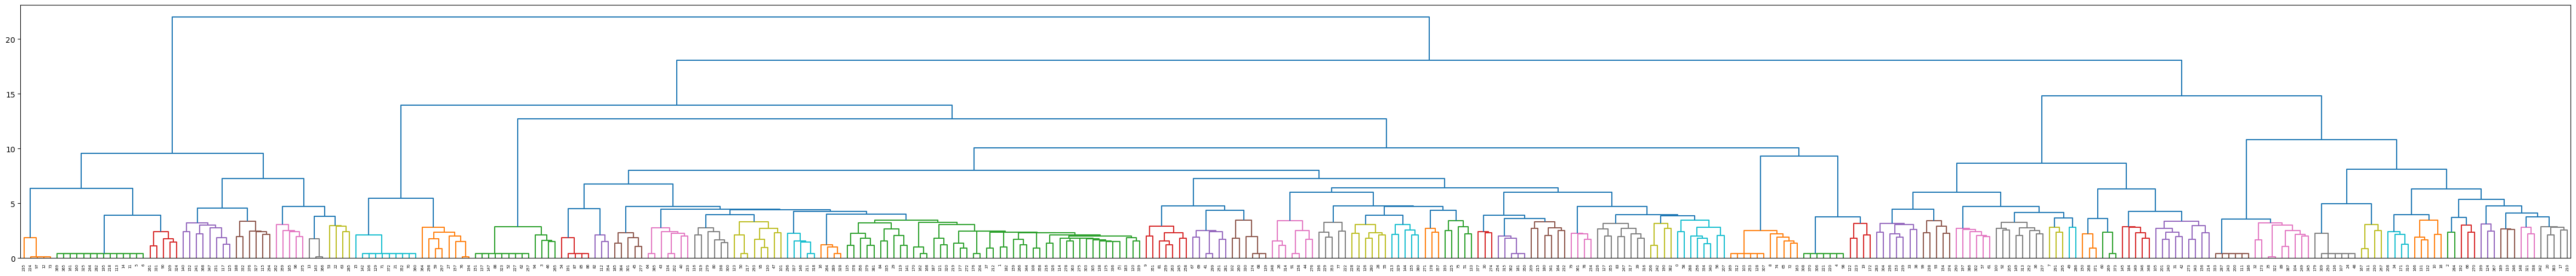

In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 读取JSON数据
with open('cluster_data.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(60, 6))
dendrogram(linkage_matrix, truncate_mode='level', color_threshold=3.5)['ivl']

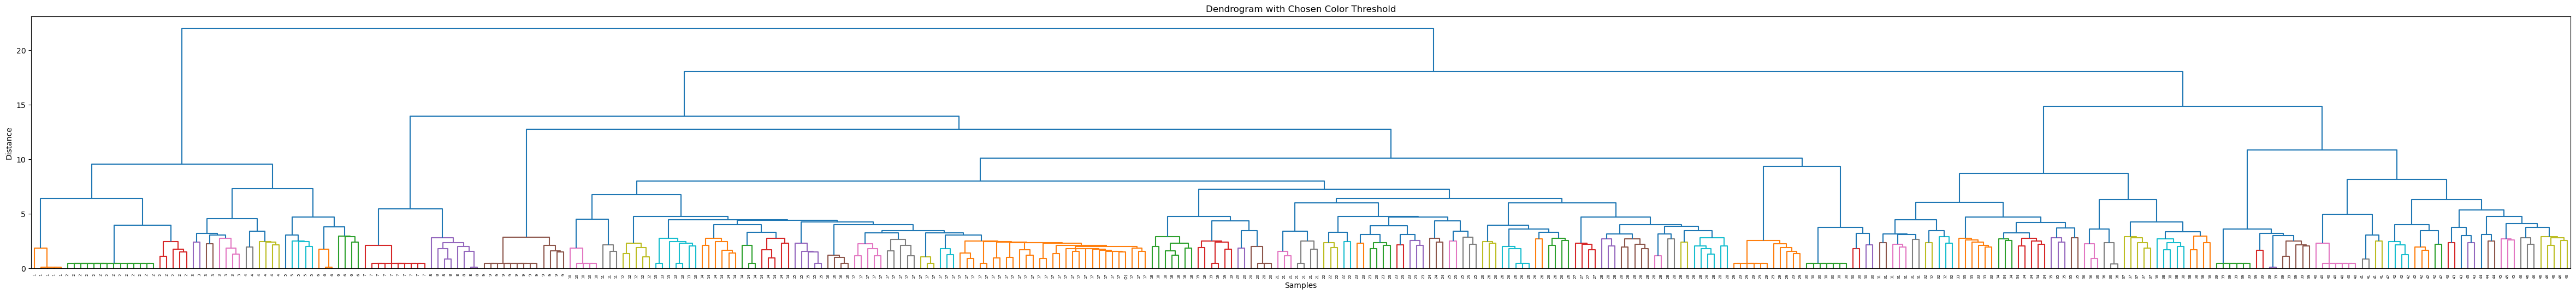

In [21]:
# 你可以选择不同的方法来计算color_threshold，如平均值、中位数等
chosen_threshold = 3

# 绘制谱系图
plt.figure(figsize=(60, 6))
dendrogram(linkage_matrix, truncate_mode='level', color_threshold=chosen_threshold, labels=cluster_result)
plt.title('Dendrogram with Chosen Color Threshold')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [27]:
dendrogram?

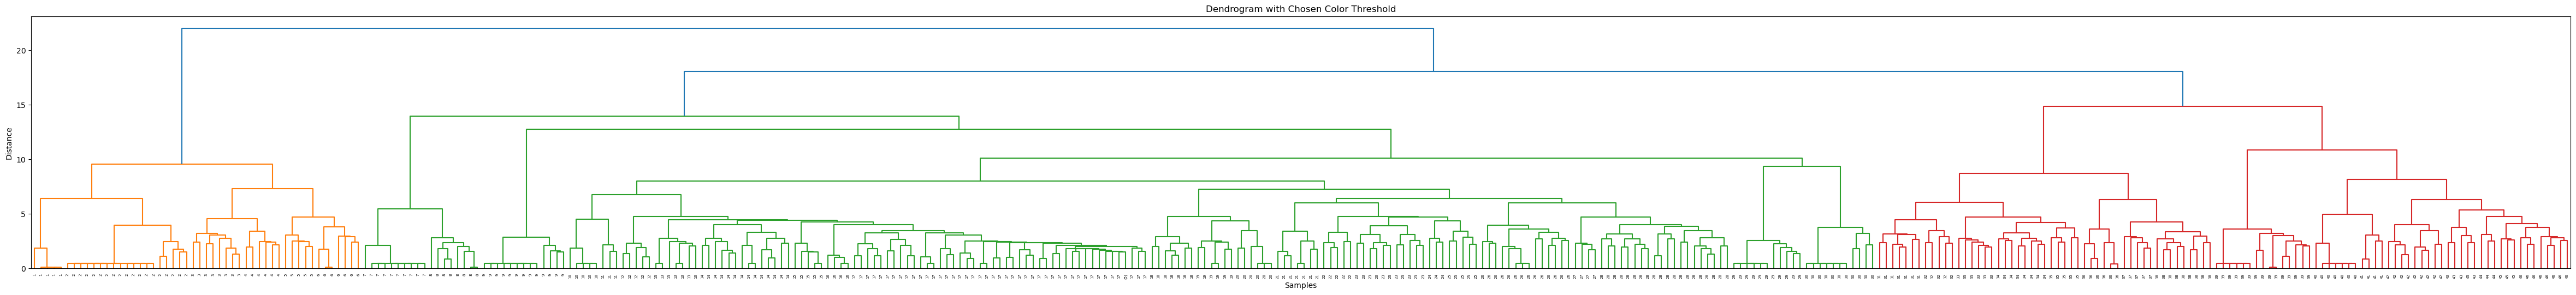

In [30]:
# 你可以选择不同的方法来计算color_threshold，如平均值、中位数等
chosen_threshold = 4.5

# 绘制谱系图
plt.figure(figsize=(60, 6))
dendrogram(linkage_matrix, truncate_mode='level', labels=cluster_result)
plt.title('Dendrogram with Chosen Color Threshold')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()